In [1]:
import sys
sys.path.append('/home/16080696/notebooks/KB-74-OPSCHALER/')
import Opschaler as op
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

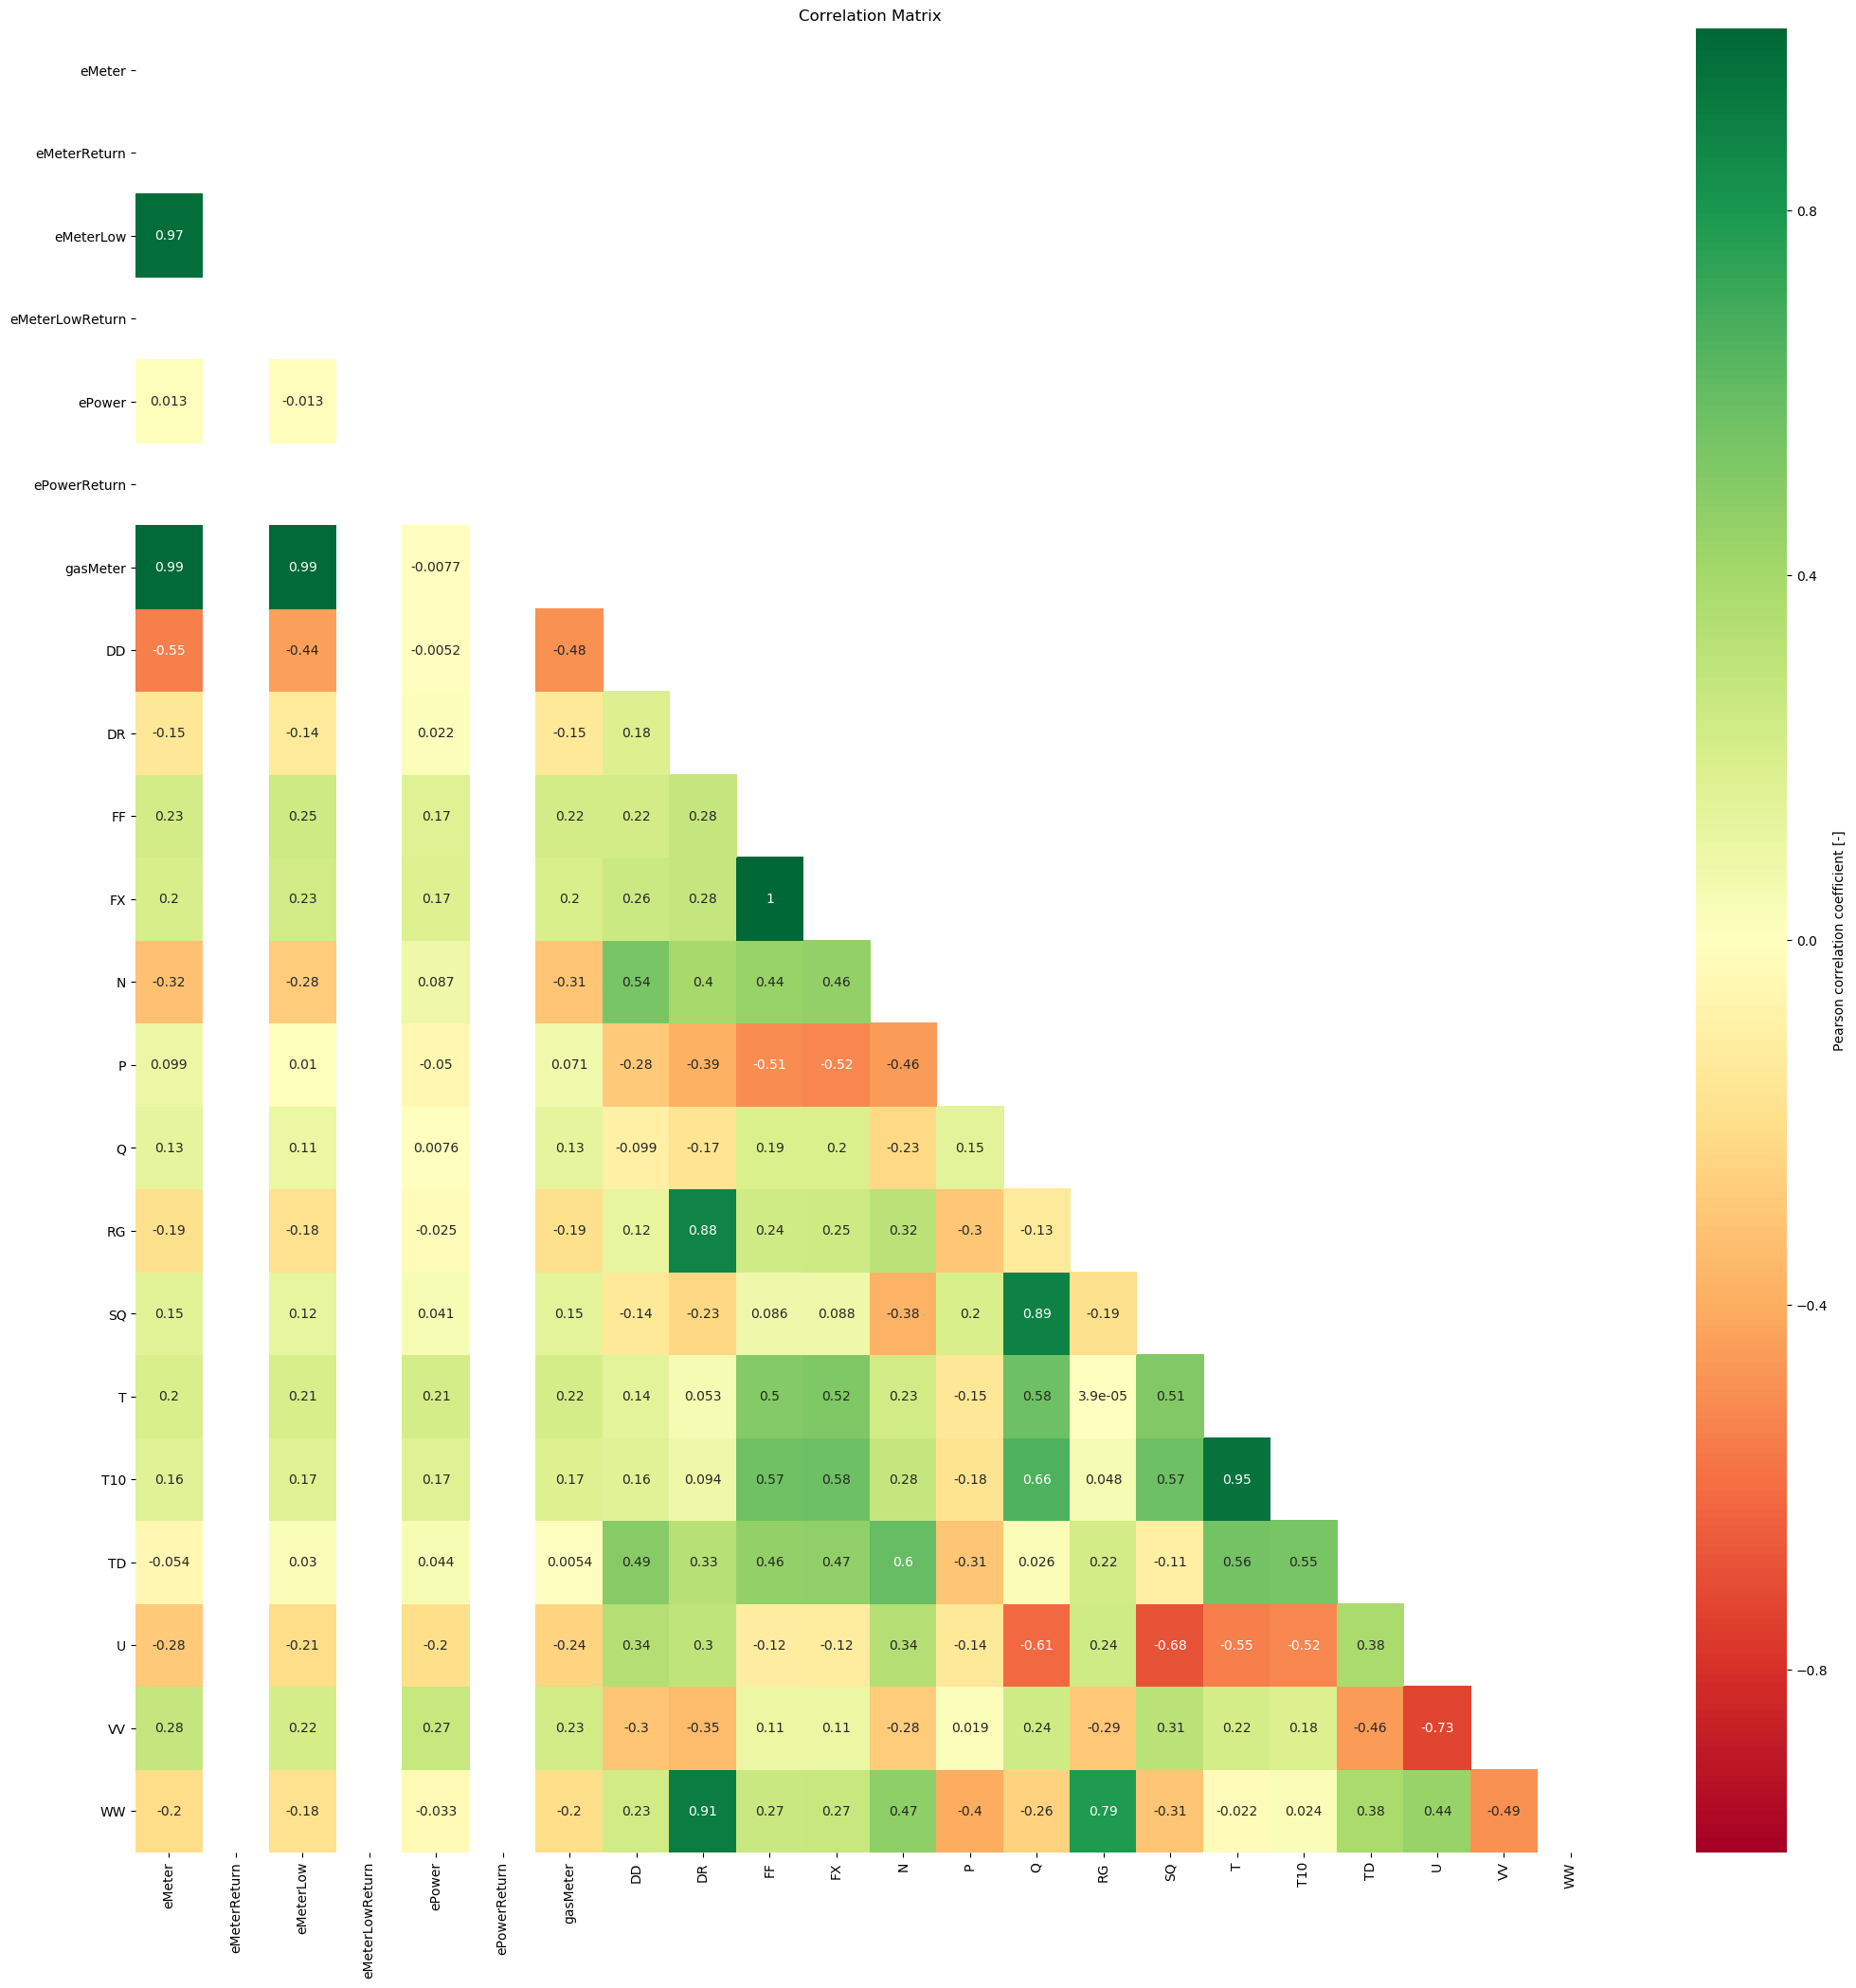

In [3]:

op.corr_df('3h','P01S01W0373')
